75
14246


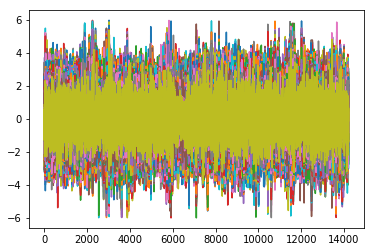

In [9]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# This cell drops irrelevant rows (i.e., warm up and syntax) and columns (beacons, layout),
# combines the activated and deactivated areas into one set, does the z transformation and
# outlier removal
# it also removes all columns that contain the name 'Unnamed'; these occur with a trailing ; in 
# each rows, which is interpreted as additional column

# Read in data and display first 5 rows
dataROI_in = pd.read_csv('esem18_act_roi.csv',sep=';',decimal='.')
# fse17_roi_deact_fse.csv contains only the deactivated voxels
datadeact_in = pd.read_csv('esem18_deact_roi.csv',sep=';',decimal='.')
print(len(dataROI_in.trial.unique()))
print(len(dataROI_in))
# remove useless junk data
dataROI_in = dataROI_in[dataROI_in.task != 'Sy']
dataROI_in = dataROI_in.drop('beacon', axis = 1)

#these are trailing d2/rest trials, i.e., they came after a syntax task, so we do not need them
dataROI_in = dataROI_in[dataROI_in.trial != 13]
dataROI_in = dataROI_in[dataROI_in.trial != 14]
dataROI_in = dataROI_in[dataROI_in.trial != 28]
dataROI_in = dataROI_in[dataROI_in.trial != 29]
dataROI_in = dataROI_in[dataROI_in.trial != 43]
dataROI_in = dataROI_in[dataROI_in.trial != 44]
dataROI_in = dataROI_in[dataROI_in.trial != 58]
dataROI_in = dataROI_in[dataROI_in.trial != 59]
dataROI_in = dataROI_in[dataROI_in.trial != 73]
dataROI_in = dataROI_in[dataROI_in.trial != 74]

datadeact_in = datadeact_in[datadeact_in.task != 'Sy']
datadeact_in = datadeact_in.drop('beacon', axis = 1)
#these are trailing d2/rest trials, i.e., they came after a syntax task, so we do not need them
datadeact_in = datadeact_in[datadeact_in.trial != 13]
datadeact_in = datadeact_in[datadeact_in.trial != 14]
datadeact_in = datadeact_in[datadeact_in.trial != 28]
datadeact_in = datadeact_in[datadeact_in.trial != 29]
datadeact_in = datadeact_in[datadeact_in.trial != 43]
datadeact_in = datadeact_in[datadeact_in.trial != 44]
datadeact_in = datadeact_in[datadeact_in.trial != 58]
datadeact_in = datadeact_in[datadeact_in.trial != 59]
datadeact_in = datadeact_in[datadeact_in.trial != 73]
datadeact_in = datadeact_in[datadeact_in.trial != 74]

# #first, drop everything that should not be z-transformed and is not necessary (proband is necessary for grouping ) ===
dataROI = dataROI_in.drop('scan', axis = 1)
dataROI = dataROI.drop('trial', axis = 1)
dataROI = dataROI.drop('task', axis = 1)
dataROI = dataROI.drop('snippet', axis = 1)
dataROI = dataROI.drop('response', axis = 1)
# add the suffix _act to now that these are activated voxels
dataROI.rename(columns=lambda x: x + '_act', inplace=True)

datadeact = datadeact_in.drop('scan', axis = 1)
datadeact = datadeact.drop('trial', axis = 1)
datadeact = datadeact.drop('task', axis = 1)
datadeact = datadeact.drop('snippet', axis = 1)
datadeact = datadeact.drop('response', axis = 1)
datadeact = datadeact.drop('proband', axis = 1)
# add the suffix _deact to now that these are deactivated voxels
datadeact.rename(columns=lambda x: x + '_deact', inplace=True)

# combine both data sets and remove unnamed columns
data = pd.concat([dataROI, datadeact], axis = 1)
data.drop(list(data.filter(regex = 'Unnamed')),axis = 1, inplace = True)

#=== z transformation =========================================================================
z_data = data.groupby(['proband_act']).transform(lambda x: (x - x.mean())/ x.std())

#=== replace outliers with consecutive mean of voxels =========================================
z_data = z_data.mask(z_data.sub(z_data.mean()).div(z_data.std()).abs().gt(6))
z_data = z_data.interpolate()

#now add the columns again ====================================================================
z_data['proband'] = dataROI_in['proband']
z_data['scan'] = dataROI_in['scan']
z_data['trial'] = dataROI_in['trial']
z_data['task'] = dataROI_in['task']
z_data['snippet'] = dataROI_in['snippet']
z_data['response'] = dataROI_in['response']

# now recode the task (i.e., labels) to numeric values for tpot
z_data['task'] = z_data['task'].replace({'TD_U': 0, 'TD': 0, 'BU': 0, 'R': 1, 'D2': 2})

# manually reset the index to start with 0; pandas does not do that automatically when deleting
# rows; it needs to be done here, otherwise, it will not work correctly
z_data.reset_index(inplace=True, drop=True)

data = z_data


In [5]:
import matplotlib.pyplot as plt

AttributeError: 'NoneType' object has no attribute 'update'

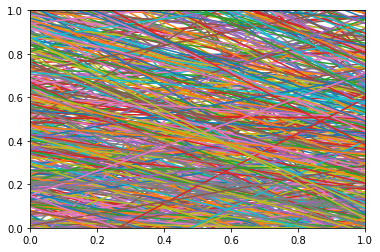

In [6]:
plt.plot(data)

In [3]:
print(data.shape)
print(data.at[18, 'scan'])
print(len(data['scan']))

(11390, 1145)
18
11390


In [18]:
len(dataROI_in.trial.unique())

60

In [19]:
data.head(35)

,140-99-73_act,140-102-73_act,140-105-73_act,140-108-73_act,140-99-76_act,140-102-76_act,140-105-76_act,140-108-76_act,140-99-79_act,140-102-79_act,...,137-186-109_deact,140-180-103_deact,140-183-103_deact,140-183-106_deact,proband,scan,trial,task,snippet,response
0,-1.161421,-0.923320,-0.320038,0.629510,-0.136895,-0.536765,-0.514446,-0.463186,-0.502790,-0.892422,...,1.795029,0.146092,0.628055,0.868627,bd96,0,0,0,arrayAverage,168147.0
1,-1.257476,-0.909639,-0.472218,0.218840,-0.140112,-0.213969,-0.352091,-0.384465,-0.116147,-0.223085,...,1.385217,-0.416112,0.042862,0.044537,bd96,1,0,0,arrayAverage,168147.0
2,-0.537064,-0.300862,-0.773474,-1.240208,0.297384,0.712767,0.028945,-0.170796,0.775871,1.227146,...,0.857380,-0.530432,-0.058034,-0.589379,bd96,2,0,0,arrayAverage,168147.0
3,-0.387332,-0.971201,-1.658605,-1.580764,-0.272004,-1.237891,-1.372606,-0.676855,0.431850,0.328499,...,0.916393,-0.228189,-0.002541,-0.394133,bd96,3,0,0,arrayAverage,168147.0
4,-0.000287,-0.454766,-1.282812,-1.347049,0.593337,-0.040423,-0.517759,-0.455688,1.549156,1.456456,...,-0.729411,-0.881222,-1.041764,-1.274007,bd96,4,0,0,arrayAverage,168147.0
5,1.180624,0.277135,0.711063,1.477560,1.831836,0.445506,1.019639,1.602287,1.329957,0.759230,...,-0.539258,-0.865561,-1.175450,-1.061012,bd96,5,0,0,arrayAverage,168147.0
6,0.629720,0.154012,0.099235,0.509314,1.284967,0.653761,0.453055,0.174074,1.311690,1.258134,...,-0.358941,-0.456828,-1.349495,-1.012834,bd96,6,0,0,arrayAverage,168147.0
7,0.358507,0.437880,0.571305,0.950033,0.602988,0.153948,0.270820,0.683882,0.520138,0.123979,...,0.660670,-0.038700,-0.693675,-0.873373,bd96,7,0,0,arrayAverage,168147.0
8,0.813355,0.437880,-0.133694,-0.312027,1.075869,0.122710,-0.136723,0.151583,1.686155,1.667174,...,0.470518,-0.386357,-0.612958,-0.576700,bd96,8,0,0,arrayAverage,168147.0
9,-0.805453,-0.235880,-0.410104,-1.183449,0.303818,-0.106371,-0.411732,-0.238270,1.186869,1.096997,...,0.037756,-0.149887,-0.378377,-0.318063,bd96,9,0,0,arrayAverage,168147.0


In [20]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

In [21]:
# start with adding the aggregation columns to the data set

import numpy as np
import random

# get all comprehension trials (i.e., remove odd ones, they are rest)
trials = list(filter(lambda x : x % 3 == 0 , data['trial'].unique()))

numVariants = 10
numConditionsPerTrial = 3

In [22]:
len(trials)

20

In [23]:
import pdb

# 2 groups
for i in range(numVariants):
#     pdb.set_trace()
    trials = list(filter(lambda x : x % 3 == 0 , data['trial'].unique()))
    random.shuffle(trials)
    tasksGroup1, tasksGroup2 = split_list(trials,2)
    colName = 'aggr_2_groups' + str(i)
    aggr_2_groups = []
    k = 0
    while k < len(data['trial']):
        if data.at[k,'trial'] % 2 == 0:
            lenTrial = 34
        else:
            lenTrial = 33
        if data.at[k,'trial'] in tasksGroup1:
            for j in range(k,k+lenTrial):
                aggr_2_groups.append('first')
        elif data.at[k,'trial'] in tasksGroup2:
            for j in range(k,k+lenTrial):
                aggr_2_groups.append('second')
        k = k + lenTrial
    data[colName] = pd.Series(aggr_2_groups)

In [24]:
print(len(aggr_2_groups[0]))
print(len(aggr_2_groups[1]))
print(len(aggr_2_groups[2]))
data['aggr_2_groups0']

5
5
5


0        second
1        second
2        second
3        second
4        second
5        second
6        second
7        second
8        second
9        second
10       second
11       second
12       second
13       second
14       second
15       second
16       second
17       second
18       second
19       second
20       second
21       second
22       second
23       second
24       second
25       second
26       second
27       second
28       second
29       second
          ...  
11360     first
11361     first
11362     first
11363     first
11364     first
11365     first
11366     first
11367     first
11368     first
11369     first
11370     first
11371     first
11372     first
11373     first
11374     first
11375     first
11376     first
11377     first
11378     first
11379     first
11380     first
11381     first
11382     first
11383     first
11384     first
11385     first
11386     first
11387     first
11388     first
11389     first
Name: aggr_2_groups0, Le

In [25]:
# 4 groups
for i in range(numVariants):
    trials = list(filter(lambda x : x % 3 ==0 , data['trial'].unique()))
    random.shuffle(trials)
    tasksGroup1, tasksGroup2, tasksGroup3, tasksGroup4 = split_list(trials,4)
    colName = 'aggr_4_groups' + str(i)
    aggr_4_groups = []
    k = 0
    while k < len(data['trial']):
        if data.at[k,'trial'] % 2 == 0:
            lenTrial = 34
        else:
            lenTrial = 33
        if data.at[k,'trial'] in tasksGroup1:
            for j in range(k,k+lenTrial):
                aggr_4_groups.append('first')
        elif data.at[k,'trial'] in tasksGroup2:
            for j in range(k,k+lenTrial):
                aggr_4_groups.append('second')
        elif data.at[k,'trial'] in tasksGroup3:
            for j in range(k,k+lenTrial):
                aggr_4_groups.append('third')
        elif data.at[k,'trial'] in tasksGroup4:
            for j in range(k,k+lenTrial):
                aggr_4_groups.append('fourth')
        k = k + lenTrial
    data[colName] = pd.Series(aggr_4_groups)

In [26]:
# 9 groups
for i in range(numVariants):
    trials = list(filter(lambda x : x % 3 == 0 , data['trial'].unique()))
    random.shuffle(trials)
    tasksGroup1, tasksGroup2, tasksGroup3, tasksGroup4, tasksGroup5 = split_list(trials,5)
    colName = 'aggr_5_groups' + str(i)
    aggr_5_groups = []
    k = 0
    while k < len(data['trial']):
        if data.at[k,'trial'] % 2 == 0:
            lenTrial = 34
        else:
            lenTrial = 33
        if data.at[k,'trial'] in tasksGroup1:
            for j in range(k,k+lenTrial):
                aggr_5_groups.append('first')
        elif data.at[k,'trial'] in tasksGroup2:
            for j in range(k,k+lenTrial):
                aggr_5_groups.append('second')
        elif data.at[k,'trial'] in tasksGroup3:
            for j in range(k,k+lenTrial):
                aggr_5_groups.append('third')
        elif data.at[k,'trial'] in tasksGroup4:
            for j in range(k,k+lenTrial):
                aggr_5_groups.append('fourth')
        elif data.at[k,'trial'] in tasksGroup5:
            for j in range(k,k+lenTrial):
                aggr_5_groups.append('fifth')
        k = k + lenTrial
    data[colName] = pd.Series(aggr_5_groups)

In [27]:
# 10 groups
for i in range(numVariants):
    trials = list(filter(lambda x : x % 3 ==0 , data['trial'].unique()))
    random.shuffle(trials)
    tasksGroup1, tasksGroup2, tasksGroup3, tasksGroup4, tasksGroup5, tasksGroup6, tasksGroup7, tasksGroup8, tasksGroup9, tasksGroup10 = split_list(trials,10)
    colName = 'aggr_10_groups' + str(i)
    aggr_10_groups = []
    k = 0
    while k < len(data['trial']):
        if data.at[k,'trial'] % 2 == 0:
            lenTrial = 34
        else:
            lenTrial = 33
        if data.at[k,'trial'] in tasksGroup1:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('first')
        elif data.at[k,'trial'] in tasksGroup2:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('second')
        elif data.at[k,'trial'] in tasksGroup3:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('third')
        elif data.at[k,'trial'] in tasksGroup4:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('fourth')
        elif data.at[k,'trial'] in tasksGroup5:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('fifth')
        elif data.at[k,'trial'] in tasksGroup6:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('sixth')
        elif data.at[k,'trial'] in tasksGroup7:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('seventh')
        elif data.at[k,'trial'] in tasksGroup8:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('eightth')
        elif data.at[k,'trial'] in tasksGroup9:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('nineth')
        elif data.at[k,'trial'] in tasksGroup10:
            for j in range(k,k+lenTrial):
                aggr_10_groups.append('tenth')
        k = k + lenTrial
    data[colName] = pd.Series(aggr_10_groups)

In [28]:
z_data.to_csv('esem_act_deact_zscore_groups.csv',sep=';',decimal='.', index=False)